In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import sympy as sp
from sympy import *

# Função de transferência G(s)

In [16]:
s, G, G_ap, b1, b2 = sp.symbols('s G(s) G_{ap}(s) b_1 b_2')
exprG = 150*(s+4)*(s+9)/((s**2+6*s+13)*(s**2+16*s+100)*(s+7))
Eq(G, 150*(s+4)*(s+9)/((s**2+6*s+13)*(s**2+16*s+100)*(s+7)))

Eq(G(s), (s + 9)*(150*s + 600)/((s + 7)*(s**2 + 6*s + 13)*(s**2 + 16*s + 100)))

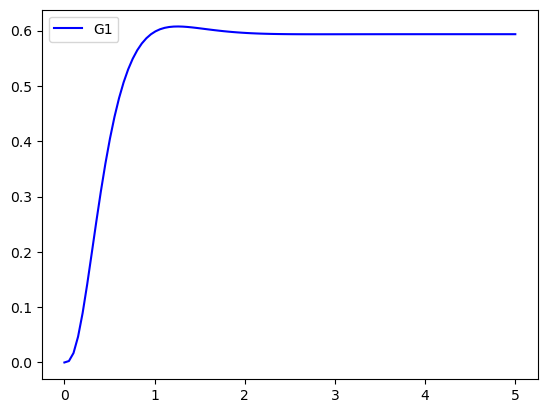

In [17]:
G1 = ct.tf(np.polymul([150, 600], [1, 9]), np.polymul([1, 6, 13], np.polymul([1, 16, 100], [1, 7])))
t = np.linspace(0,5, 100)
t1, y1 = ct.step_response(G1, t)
plt.plot(t1, y1, 'b-', label='G1')
plt.legend()

[-8.+6.j -8.-6.j -7.+0.j -3.+2.j -3.-2.j]


array([[list([<matplotlib.lines.Line2D object at 0x000001C6502D9A50>]),
        list([<matplotlib.lines.Line2D object at 0x000001C6503CB850>])]],
      dtype=object)

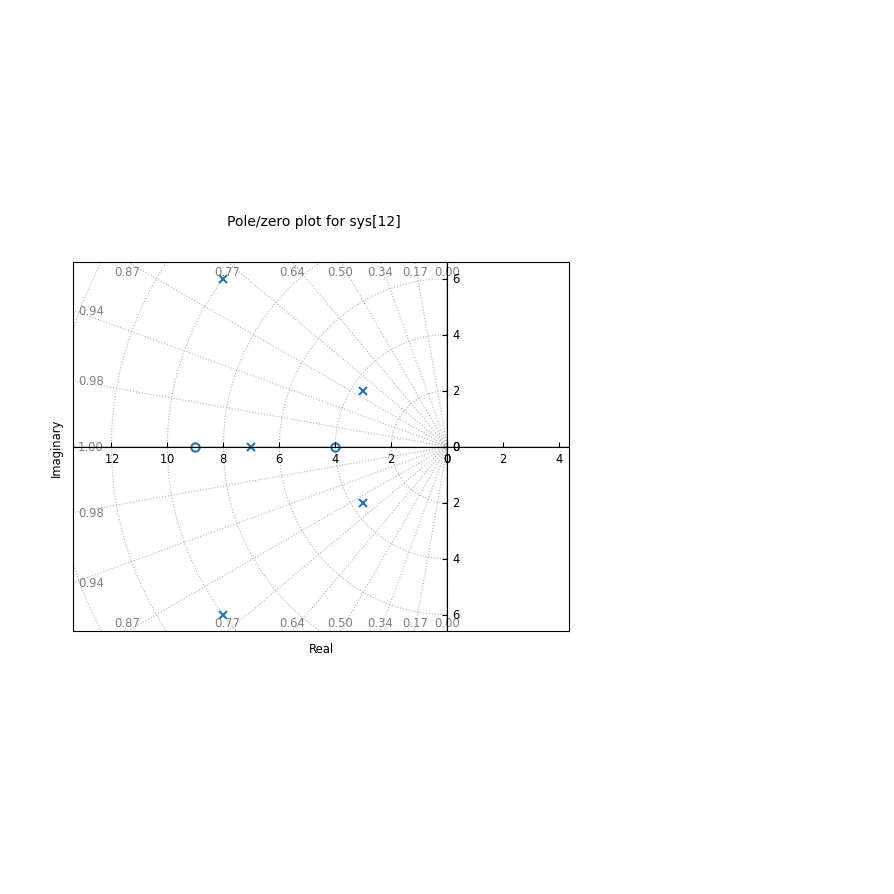

In [18]:
response = ct.pole_zero_map(G1)
print(ct.poles(G1))
ct.pole_zero_plot(response, grid=True)

# Usando os dois polos mais proximos da origem para a aproximacao

In [38]:
exprGap = b1/(s+3-2*I)+b1/(s+3+2*I)
Eq(G_ap, exprGap)

Eq(G_{ap}(s), b_1/(s + 3 + 2*I) + b_1/(s + 3 - 2*I))

# Calculando os coeficietes b_i, i={1,2,.....,r}, onde r representa os r's polos mais lentos, temos
 $G_{ap}^{(k)}(0)=G^{(k)}, k=0,...,r-1$

In [40]:
sp.solveset(Eq(exprG.subs(s,0), exprGap.subs(s, 0)), b1)

{9/7}

In [52]:
sp.simplify(Eq(G_ap, (exprGap.subs(b1, b1/7)).subs(b1, 9)))

Eq(G_{ap}(s), 18*(s + 3)/(7*(s**2 + 6*s + 13)))

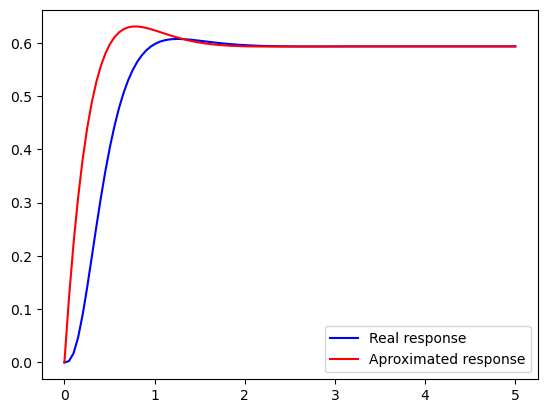

In [53]:
Gap = ct.tf([18, 3*18], [7, 7*6, 7*13])
tap, yap = ct.step_response(Gap, t)
plt.plot(t1, y1, 'b-', label='Real response')
plt.plot(tap, yap, 'r-', label='Aproximated response')
plt.legend()